In [19]:
import numpy as np
from sklearn.decomposition import PCA
from numpy import linalg as LA
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib.pyplot import figure
import math as m 
import csv
import pandas as pd
from sklearn import preprocessing
from factor_analyzer import FactorAnalyzer
import statsmodels.api as smf
import seaborn as sns



file = open('psycho.txt','r')
data = file.read()

In [2]:
regressors = []
data_mat = []

with open('psycho.txt', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    line_count = 0
    for i,row in enumerate(csv_reader):
        items = list(row.items())        
        i = items[0][1]
        i = [int(x) for x in i.split()]
        i.pop(0)
        data_mat.append(i)
        regressors = items[0][0]
        regressors = [x for x in regressors.split()]

data_mat = np.asarray(data_mat)

In [7]:
## PCA 

S_cov = np.cov(data_mat.transpose())

eigenValues_cov, eigenVectors_cov = LA.eigh(S_cov)
idx_cov = eigenValues_cov.argsort()[::-1]   
eigenValues_cov = eigenValues_cov[idx_cov]
eigenVectors_cov = eigenVectors_cov[:,idx_cov]
eigenVectors_cov = eigenVectors_cov / np.linalg.norm(eigenVectors_cov)

print("Explained variance correlation")
explained_var_cov = [sum(eigenValues_cov[0:i])/np.matrix.trace(S_cov) for i in range(0,33)]

print("Covariance")
for i in range(1,10):
    print(str(i) + " pc gives "+ str(round(explained_var_cov[i]*100,2)) + 
          "% explained variance.")

Explained variance correlation
Covariance
1 pc gives 22.98% explained variance.
2 pc gives 38.45% explained variance.
3 pc gives 48.9% explained variance.
4 pc gives 55.85% explained variance.
5 pc gives 61.27% explained variance.
6 pc gives 65.41% explained variance.
7 pc gives 68.18% explained variance.
8 pc gives 70.77% explained variance.
9 pc gives 73.17% explained variance.


In [4]:
nr_of_eigV = 3
values = eigenVectors_cov[:,0:nr_of_eigV]
names = ["distant","talkatv","carelss","hardwrk","anxious","agreebl",
 "tense","kind","opposng","relaxed","disorgn","outgoin","approvn","shy","discipl","harsh","persevr","friendl",
 "worryin","respnsi","contrar","sociabl","lazy","coopera","quiet","organiz","criticl","lax","laidbck","withdrw",
 "givinup","easygon"]
df = pd.DataFrame(np.array(values.transpose()), columns=names)
df

,distant,talkatv,carelss,hardwrk,anxious,agreebl,tense,kind,opposng,relaxed,...,lazy,coopera,quiet,organiz,criticl,lax,laidbck,withdrw,givinup,easygon
0,-0.042859,0.033052,-0.032679,0.020886,-0.034077,0.012174,-0.036777,0.019709,-0.019200,0.020932,...,-0.039814,0.019134,-0.046763,0.036324,-0.016498,-0.010177,0.012071,-0.050819,-0.038332,0.019628
1,-0.010813,0.016788,0.040404,-0.034874,-0.033342,0.008722,-0.043179,-0.010408,-0.001313,0.043494,...,0.041956,0.000817,-0.015723,-0.059518,-0.025102,0.042475,0.048998,-0.011105,0.010464,0.032467
2,0.021761,-0.058415,-0.034816,-0.009527,-0.042296,0.010548,-0.048102,0.009129,-0.038316,0.037951,...,-0.011726,0.013249,0.051980,0.020909,-0.028848,0.002043,0.025356,0.028894,-0.002018,0.016213


In [9]:
S_cov.shape

(32, 32)

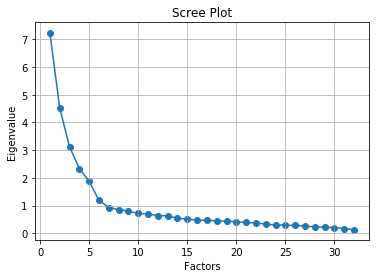

In [10]:
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

df = pd.DataFrame(np.array(data_mat), columns=names)

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

fa = FactorAnalyzer(rotation=None)
fa.fit(df)
FactorAnalyzer(is_corr_matrix=False,
        method='minres', rotation=None, rotation_kwargs={},
        use_smc=True)
ev, v = fa.get_eigenvalues()
ev

plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [54]:
nr_factors = 6
fa=FactorAnalyzer(n_factors=nr_factors)
fa.fit(df)
factor_variances = fa.get_factor_variance()[0]
loadings = fa.loadings_
factors = ["Factor" + str(i+1) for i in range(nr_factors)]
loading_mat = pd.DataFrame(np.array(loadings), index=names, columns = factors)

cm = sns.light_palette("green", as_cmap=True)
loading_mat = loading_mat.style.background_gradient(cmap=cm)

loading_mat

#factor1: introvert/extrovert
#factor2: chill/anxious
#factor3: hardworking/lazy
#factor4: kind/angry


,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
distant,0.613988,-0.0431122,0.188298,-0.041415,0.14436,0.192763
talkatv,-0.810121,0.0545215,0.0310463,0.0539562,0.175663,0.202237
carelss,-0.0343567,0.0848106,-0.00311568,-0.00186024,0.71853,0.069929
hardwrk,-0.083819,0.0935539,0.709706,0.105673,0.0116219,0.0814001
anxious,0.0816369,0.726762,-0.00227738,0.258192,0.149874,0.117156
agreebl,0.0986213,0.0227231,0.0895491,0.666671,0.15923,-0.154421
tense,0.0429233,0.785655,0.0225353,0.107915,0.0938914,0.158
kind,0.00585244,0.113227,0.0928656,0.634191,-0.2198,-0.0587516
opposng,-0.114578,0.0218646,-0.0520846,-0.114914,-0.0492169,0.671813
relaxed,0.115759,-0.690181,-0.0552089,0.288324,-0.00808676,0.0422002


                        Factor1   Factor2   Factor3   Factor4   Factor5  \
SS loadings            4.518901  2.973467  2.806537  2.504139  2.378164   
Proportional variance  0.141216  0.092921  0.087704  0.078254  0.074318   
Cumulative variance    0.141216  0.234136  0.321841  0.400095  0.474413   

                        Factor6  
SS loadings            2.190988  
Proportional variance  0.068468  
Cumulative variance    0.542881  


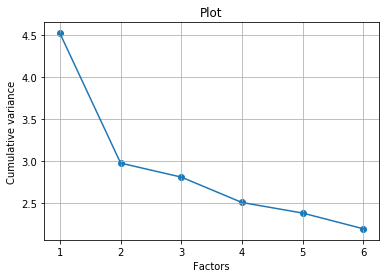

In [55]:
property_names = ["SS loadings", "Proportional variance", "Cumulative variance"]
factor_var = fa.get_factor_variance()
model_analysis = pd.DataFrame(np.array(factor_var), index=property_names, columns = factors)
print(model_analysis)

plot_property = 0 #0 - ss_load, 1 - prop_var, 2. cum_var
plt.scatter(range(1,factor_var[0].size+1),factor_var[:][0])
plt.plot(range(1,factor_var[0].size+1),factor_var[:][0])
plt.title('Plot')
plt.xlabel('Factors')
plt.ylabel('Cumulative variance')
plt.grid()
plt.show()

In [44]:
factor_var[0]
factor_var[0]+1

array([5.22765489, 3.55216362, 3.51595224, 3.27092397, 3.09733091,
       2.84589171, 2.83417245, 2.05929423])